In [ ]:
# For Matrix Operations
import sklearn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

# For Plotting
from matplotlib import pyplot as plt
import plotly
import plotly.graph_objects as go
import os
import imageio

# For TDA
import gudhi
import gudhi.wasserstein
import gudhi.hera
import ot

In [ ]:
def persistence(array, dimension=None):
  height, width = array.shape
  cubeComplex = gudhi.CubicalComplex(
      dimensions = [width,height],
      top_dimensional_cells = 255 - array.flatten()
  )
 
  if dimension == None:
    persistence = cubeComplex.persistence()
  else:
    cubeComplex.compute_persistence()
    persistence = cubeComplex.persistence_intervals_in_dimension(dimension)
    
  return persistence



### 6, shifted 6, and 9

In [ ]:
# fetching Mnist, finding a six and a nine. Creating an f and g for our test:

X, y = fetch_openml('Mnist_784', version = 1, return_X_y = True, as_frame = False)
# X is 70000 images, y is the classifications
X.shape
# taking each image and turning it into a 3d array. Each slide is a 28 by 28 grayscale grid

X = X.reshape(X.shape[0],28,28)

# finding all the 6's and 9's and filtering them out
Sixes = X[np.where(y == '6')]
Nines = X[np.where(y == '9')]

# can change this to a Nine if we want a Nine
f = Sixes[0]

g = Nines[0]


f_prime = np.zeros_like(Sixes[0])
for i in range(f_prime.shape[0]):
    for j in range(f_prime.shape[1]):
        f_prime[i][j] = f[i][j-5]
# plt.imshow(f_prime)
# plt.axis('off')
# plt.savefig(f'/Users/dgottschalk/Desktop/prelim presentation figures/6_Shift')


# our first 6
# plt.imshow(f)
# plt.axis('off')
# plt.show()

# # our first 9
# plt.imshow(g)
# plt.axis('off')
# plt.show()


In [ ]:
eight = (X[np.where(y == '8')][0])
plt.imshow(255 - eight > 0, cmap = 'gray')
plt.title(f'(255 - f) > {0}')

plt.savefig(f'/Users/dgottschalk/Desktop/prelim presentation figures/PH_{0}')

plt.imshow(255 - eight > 10, cmap = 'gray')
plt.title(f'(255 - f) > {10}')

plt.savefig(f'/Users/dgottschalk/Desktop/prelim presentation figures/PH_{10}')

plt.imshow(255 - eight > 50, cmap = 'gray')
plt.title(f'(255 - f) > {50}')

plt.savefig(f'/Users/dgottschalk/Desktop/prelim presentation figures/PH_{50}')

plt.imshow(255 - eight > 100, cmap = 'gray')
plt.title(f'(255 - f) > {100}')

plt.savefig(f'/Users/dgottschalk/Desktop/prelim presentation figures/PH_{100}')


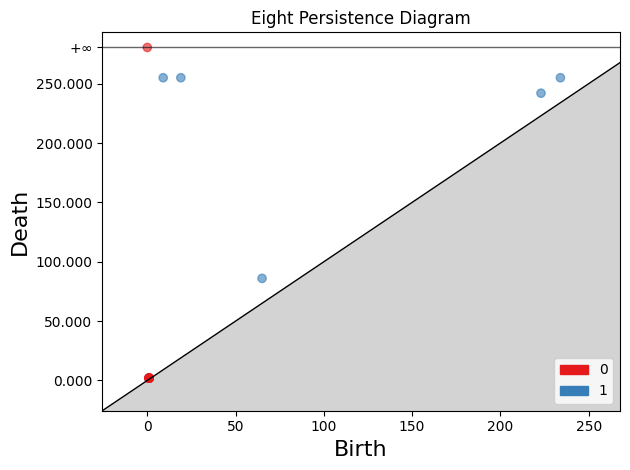

In [152]:
gudhi.plot_persistence_diagram(persistence(eight, dimension=None))
plt.title(f'Eight Persistence Diagram')
plt.tight_layout()
plt.savefig(f'/Users/dgottschalk/Desktop/prelim presentation figures/Eight_PD')


PDS

In [ ]:
# PD for 6
gudhi.plot_persistence_diagram(persistence(f, dimension=1))
plt.title(f'Six Persistence Diagram')
plt.tight_layout()
plt.savefig(f'/Users/dgottschalk/Desktop/prelim presentation figures/6PD', bbox_inches = 'tight')

# PD for shifted 6
gudhi.plot_persistence_diagram(persistence(f_prime, dimension=1))
plt.title(f'Six_Shift Persistence Diagram')
plt.tight_layout()
plt.savefig(f'/Users/dgottschalk/Desktop/prelim presentation figures/6_ShiftPD', bbox_inches = 'tight')

# PD for 9
gudhi.plot_persistence_diagram(persistence(g, dimension=1))
plt.title(f'Nine Persistence Diagram')
plt.tight_layout()
plt.savefig(f'/Users/dgottschalk/Desktop/prelim presentation figures/9PD', bbox_inches = 'tight')


### homotopy

In [ ]:
t = 100
D = 1
# creates equal intervals from 0 to 100
ts = np.linspace(0,1,t)
# creates homology from f to g using these intervals
hs = np.array([(t * f) + (1-t) * g for t in ts])

PDD = [persistence(h,dimension = D) for h in hs]



Color images of 6's and 9's

In [ ]:

for x in range(5):
    plt.imshow(hs[x*20])
    plt.axis('off')
    plt.title(f't = {x*20}',size = 24)
    plt.tight_layout()

   #plt.savefig(f'/Users/dgottschalk/Desktop/prelim presentation figures/69_t{x*20}', bbox_inches = 'tight')

plt.imshow(hs[99])
plt.axis('off')
plt.title(f't = {100}', size = 24)
plt.tight_layout()

#plt.savefig(f'/Users/dgottschalk/Desktop/prelim presentation figures/69_t{100}', bbox_inches = 'tight')


6 and 9 persistence diagrams

In [ ]:
for x in range(5):
    gudhi.plot_persistence_diagram(PDD[x*20])
    plt.title(f't = {x*20}')
    plt.tight_layout()
    plt.savefig(f'/Users/dgottschalk/Desktop/prelim presentation figures/69PD_t{x*20}', bbox_inches = 'tight')

gudhi.plot_persistence_diagram(PDD[99])
plt.title(f't = {100}')
plt.tight_layout()
plt.savefig(f'/Users/dgottschalk/Desktop/prelim presentation figures/69PD_t{100}', bbox_inches = 'tight')


In [ ]:
# import matplotlib.animation as animation

# # for x in range(len(PDDS)):
# #     gudhi.plot_persistence_diagram(PDD[x])
# #     plt.title(f't = {x}')
# #     #plt.savefig(f'/Users/dgottschalk/Desktop/prelim presentation figures/69_t{x*20}')

# fig, ax = plt.subplots()

# def update(frame):
#     ax.clear()  # Clear previous frame
#     gudhi.plot_persistence_diagram(PDD[frame])
#     ax.axis('off')  # Turn off axes
#     ax.set_title(f'Frame {frame}')  # Optional: set a title
#     return ax

# ani = animation.FuncAnimation(fig, update, frames=len(PDD), interval=200)

# # Save the animation as a GIF
# ani.save('/Users/dgottschalk/Desktop/prelim presentation figures/69PD_animation.gif', writer='imagemagick', fps=10)

# plt.show()

### Clustering

In [ ]:
def persistence(array, dimension=None):
  height, width = array.shape
  cubeComplex = gudhi.CubicalComplex(
      dimensions = [width,height],
      top_dimensional_cells = 255 - array.flatten()
  )
 
  if dimension == None:
    persistence = cubeComplex.persistence()
  else:
    cubeComplex.compute_persistence()
    persistence = cubeComplex.persistence_intervals_in_dimension(dimension)
    
  return persistence
def Get_Vinyard(f, g, D, t = 101):
##########
    # input:
        # f and g by which you want to interpolate using straight line homotopy
        # the dimension of persistence you want
    # output:
        # series of persistence diagrams: hs
        # persistence vinyard polotted in 3d space: res
        # death value of largest persistence: mx

##########


    # creates equal intervals from 0 to 100
    ts = np.linspace(0,1,t)
    # creates homology from f to g using these intervals
    hs = np.array([(t * f) + (1-t) * g for t in ts])
    
    PDD = [persistence(h,dimension = D) for h in hs]

# tracking each vine. the third entry tracks what vine is matche dup to what wasserstein point
    # vines[0] is birth frame
    # vines[1] is death frame
    # vines[2] keeps track of what point the vine is in the corresponding persistence diagram
    vines = [[0, None, [x,]] for x in range(len(PDD[0]))]
    # each vine is matched to itself in the ends matrix
    ends = {x:x for x in range(len(PDD[0]))}

    for i in range(1, len(ts)):
        dist, match = gudhi.hera.wasserstein_distance(PDD[i-1], PDD[i], matching = True)

        baby = [] 

        new_ends = {k:ends[k] for k in ends}
        for j, (x,y) in enumerate(match):
            if x == -1:
                baby.append(j)
            elif y == -1:
                # ends the vine
                
                # we record death frame
                vines[ends[x]][1] = i
                # -1 tells us the vine is dead in our PD
                vines[ends[x]][2].append(-1)
            else:
                # updating vines. Adding the match to our vines matrix
                vines[ends[x]][2].append(y)
                # setting ends to new_ends for the next iteration
                new_ends[y] = ends[x] 

        for j in baby:
            x, y = match[j]
            new_ends[y] = len(vines)
            vines.append([i, None, [y,]])
            # print(f"new {y} -> *")

        for k in [l for l in ends]: 
            if k >= len(PDD[i]):
                del new_ends[k]

        ends = new_ends


    # this block takes the tracking in vines[i][2] and replaces it with the numpy array of the vines birth and death times.
    # these times are taken at each time step of our vinyard
    # for example: poss[1][2][3] is the birth/death times of vine number 2 at time step 4. Note that indices are 1 less than their frame #
    poss = vines
    for i,_ in enumerate(vines):
        repl = []
        for j,x in enumerate(vines[i][2]):
            # if vine is dead at that frame
            if x == -1:
                repl.append(np.mean(PDD[vines[i][0]+j-1][vines[i][2][j-1]])*np.ones((2,))) # proj prev
            else:
                repl.append(PDD[vines[i][0]+j][x])
        poss[i][2] = np.array(repl)




    # these are the vine values in 3d space

    # we iterate through each vine, to create a res entry (res[0] corresponds to vine zero)
    # res[0][b(t) -> d(t)] is a triple list consisting of:
        # [time value, birth time, death time]

    res = [[[ts[p[0]+np.arange(len(p[2]))][i], *x] for i,x in enumerate(p[2])] for p in poss]

    mx = 'hey'
    #mx = np.max([np.max(p[2]) for p in poss if np.inf not in p[2]])
    # getting the max death time of all the vines

    return res, mx, hs
def Plot_Vinyard(res, mx, hs):


    gos = []

    # x axis is time
    # y axis is birth time
    # z axis is death time
    for vine in res:
        vine = np.array(vine)

        gos.append(go.Scatter3d(x=vine[:,0], y=vine[:,1], z=vine[:,2], marker=dict(
            size=2,
        ),
        line=dict(
            width=2
        )))


    xs = np.linspace(0, mx, 10)
    zs = np.linspace(0, 1, 10)
    xss, zss = np.meshgrid(xs, zs)
    gos.append(go.Surface(x=zss, y=xss, z=xss, colorscale=[[0, '#333'], [1, '#333']], opacity=0.1, showscale=False)) # x - y = 0: diag plane
    fig = go.Figure(data=gos)

    fig.update_layout(
        width=800,
        height=700,
        scene=dict(
        xaxis_title='T (homotopy)',
        yaxis_title='Birth',
        zaxis_title='Death'
    )
    )

    fig.show()
def vdist(res, f, g): # diag weight func, length weight func
    V = 0
    for vine in res:
        vine = np.array(vine)
        v, L = 0, 0
        for i in range(1, len(vine)):
            l = np.linalg.norm(vine[i][1:]-vine[i-1][1:])
            dt = vine[i][0] - vine[i-1][0]

            mid = np.mean([vine[i][1:],vine[i-1][1:]], axis=0)
            proj = np.mean(mid)*np.ones(2,)
            # this is the persistence of the mid point distance traveled
            D = np.linalg.norm(proj-mid)
            
            v += f(D)*l*dt
            L += l*dt

        v *= g(L)
        V += v

    return V
def fD(D):
    return D/100
def fL(L):
    return 1


#### Vineyard and Wasserstein 69

In [ ]:
def Test_Mnist(N1, N2, dimension = 1, no_samples = 100):

    # fetching Mnist, finding a three and a eight. Creating an f and g for our test:

    X, y = fetch_openml('Mnist_784', version = 1, return_X_y = True, as_frame = False)
    # X is 70000 images, y is the classifications
    X.shape
    # taking each image and turning it into a 3d array. Each slide is a 28 by 28 grayscale grid

    X = X.reshape(X.shape[0],28,28)

    # finding all the 6's and 9's and filtering them out
    f = X[np.where(y == str(N1))]
    g = X[np.where(y == str(N2))]


    if no_samples > len(f) or no_samples >len(g):
        no_samples = max(len(f), len(g))
    f = f[:no_samples]
    g = g[:no_samples]

    Combined_Array = np.concatenate((f, g), axis = 0)

    # Distances Calculations
    Vinyard_Distances = np.zeros((Combined_Array.shape[0], Combined_Array.shape[0]))

    for i in range(Combined_Array.shape[0]):
        for j in range(i+1,Combined_Array.shape[0]):
            Vinyard_Distances[i,j] = vdist(Get_Vinyard(Combined_Array[i], Combined_Array[j],dimension, t = 25)[0],fD,fL)
    Vinyard_Distances += np.transpose(Vinyard_Distances)

    # MDS Embedding
    Vinyard_MDS_Embedding = MDS(n_components = 2, metric = True, dissimilarity = 'precomputed', random_state = 32).fit_transform(Vinyard_Distances)


    # Plotting
    fig, ax = plt.subplots()

    # Red is N1 and Blue is N2
    scatter = ax.scatter(Vinyard_MDS_Embedding[:, 0], Vinyard_MDS_Embedding[:, 1], c = ['red'] * no_samples + ['blue'] * no_samples, s=10)


    plt.title('Vinyard MDS')
    plt.xlabel('MDS Component 1')
    plt.ylabel('MDS Component 2')
    plt.savefig('/Users/dgottschalk/Desktop/prelim presentation figures/69_Vinyard_MDS')

    return Vinyard_Distances
#Test_Mnist(6,9, dimension = 1, no_samples = 100)

In [ ]:
# Wasserstein MDS
def Wasserstein_MNIST(N1, N2, dimension =1, no_samples = 100):

    # fetching Mnist, finding a three and a eight. Creating an f and g for our test:

    X, y = fetch_openml('Mnist_784', version = 1, return_X_y = True, as_frame = False)
    # X is 70000 images, y is the classifications
    X.shape
    # taking each image and turning it into a 3d array. Each slide is a 28 by 28 grayscale grid

    X = X.reshape(X.shape[0],28,28)

    # finding all the 6's and 9's and filtering them out
    f = X[np.where(y == str(N1))]
    g = X[np.where(y == str(N2))]


    if no_samples > len(f) or no_samples >len(g):
        no_samples = max(len(f), len(g))
    f = f[:no_samples]
    g = g[:no_samples]

    Combined_Array = np.concatenate((f, g), axis = 0)
    
    W_Distances = np.zeros((len(Combined_Array), len(Combined_Array)))

    Total_PDD = [persistence(img,dimension) for img in  Combined_Array]

    for i in range(len(Combined_Array)):
        for j in range(len(Combined_Array)):
            if i <= j:
                W_Distances[i,j] = gudhi.hera.wasserstein_distance(Total_PDD[i], Total_PDD[j])
    W_Distances += W_Distances.transpose()

    Wasserstein_Embedding = MDS(n_components = 2, metric = True, dissimilarity = 'precomputed', random_state = 32).fit_transform(W_Distances)

    # Plotting
    fig, ax = plt.subplots()

    # Red is N1 and Blue is N2
    scatter = ax.scatter(Wasserstein_Embedding[:, 0], Wasserstein_Embedding[:, 1], c = ['red'] * no_samples + ['blue'] * no_samples, s=10)

    plt.title('Wasserstein MDS')
    plt.xlabel('MDS Component 1')
    plt.ylabel('MDS Component 2')
    plt.savefig('/Users/dgottschalk/Desktop/prelim presentation figures/69_Wasserstein_MDS')

    return W_Distances
#Wasserstein_MNIST(6,9,1,100)

#### Vineyard and Wasserstein 6 vs 6 shift

In [ ]:
def six_shift(shift_units = 5, dimension = 1, no_samples = 100):
    # fetching Mnist, finding a three and a eight. Creating an f and g for our test:

    X, y = fetch_openml('Mnist_784', version = 1, return_X_y = True, as_frame = False)
    # X is 70000 images, y is the classifications
    X.shape
    # taking each image and turning it into a 3d array. Each slide is a 28 by 28 grayscale grid

    X = X.reshape(X.shape[0],28,28)

    # finding all the 6's and 9's and filtering them out
    f = X[np.where(y == str(6))]

    if no_samples > len(f):
        no_samples = max(len(f))
    f = f[:no_samples]
    g = np.zeros_like(f)


    for i in range(no_samples):
        g[i][:, shift_units:] = f[i][:, :-shift_units]


    Combined_Array = np.concatenate((f, g), axis = 0)

    # Distances Calculations
    Vinyard_Distances = np.zeros((Combined_Array.shape[0], Combined_Array.shape[0]))

    for i in range(Combined_Array.shape[0]):
        for j in range(i+1,Combined_Array.shape[0]):
            Vinyard_Distances[i,j] = vdist(Get_Vinyard(Combined_Array[i], Combined_Array[j],dimension, t = 25)[0],fD,fL)
    Vinyard_Distances += np.transpose(Vinyard_Distances)

    # MDS Embedding
    Vinyard_MDS_Embedding = MDS(n_components = 2, metric = True, dissimilarity = 'precomputed', random_state = 32).fit_transform(Vinyard_Distances)


    # Plotting
    fig, ax = plt.subplots()

    # Red is N1 and Blue is N2
    scatter = ax.scatter(Vinyard_MDS_Embedding[:, 0], Vinyard_MDS_Embedding[:, 1], c = ['red'] * no_samples + ['blue'] * no_samples, s=10)


    plt.title('Vinyard MDS')
    plt.xlabel('MDS Component 1')
    plt.ylabel('MDS Component 2')
    plt.savefig('/Users/dgottschalk/Desktop/prelim presentation figures/shift6_Vinyard_MDS')
    
    return Vinyard_Distances
#six_shift(shift_units = 5, dimension = 1, no_samples = 100)


In [ ]:
def six_shift_wasserstein(shift_units = 5, dimension = 1, no_samples = 100):

    # fetching Mnist, finding a three and a eight. Creating an f and g for our test:

    X, y = fetch_openml('Mnist_784', version = 1, return_X_y = True, as_frame = False)
    # X is 70000 images, y is the classifications
    X.shape
    # taking each image and turning it into a 3d array. Each slide is a 28 by 28 grayscale grid

    X = X.reshape(X.shape[0],28,28)

    # finding all the 6's and 9's and filtering them out
    f = X[np.where(y == str(6))]

    if no_samples > len(f):
        no_samples = max(len(f))
    f = f[:no_samples]
    g = np.zeros_like(f)


    for i in range(no_samples):
        g[i][:, shift_units:] = f[i][:, :-shift_units]

    # combining f and g
    Combined_Array = np.concatenate((f, g), axis = 0)
    # computing persistence diagrams
    Total_PDD = [persistence(img,dimension) for img in  Combined_Array]
    # Distances Calculations

    W_Distances = np.zeros((Combined_Array.shape[0], Combined_Array.shape[0]))

    for i in range(len(Combined_Array)):
        for j in range(len(Combined_Array)):
            if i <= j:
                W_Distances[i,j] = gudhi.hera.wasserstein_distance(Total_PDD[i], Total_PDD[j])
    W_Distances += W_Distances.transpose()

    Wasserstein_Embedding = MDS(n_components = 2, metric = True, dissimilarity = 'precomputed', random_state = 32).fit_transform(W_Distances)

    # Plotting
    fig, ax = plt.subplots()

    # Red is N1 and Blue is N2
    scatter = ax.scatter(Wasserstein_Embedding[:, 0], Wasserstein_Embedding[:, 1], c = ['red'] * no_samples + ['blue'] * no_samples, s=10)


    plt.title('Wasserstein MDS')
    plt.xlabel('MDS Component 1')
    plt.ylabel('MDS Component 2')
    plt.savefig('/Users/dgottschalk/Desktop/prelim presentation figures/shift6_Wasserstein_MDS')

    return W_Distances
#six_shift_wasserstein(shift_units = 5, dimension = 1, no_samples = 100)


### Geospatial

In [153]:
# For Matrix Operations
import sklearn
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
import numpy as np
import pandas as pd

# For Plotting
from matplotlib import pyplot as plt
import plotly
import plotly.graph_objects as go
import mplcursors

# for Geospatial
import geopandas as gpd
from gerrychain import Graph
import networkx as nx

# For TDA
import gudhi
import gudhi.wasserstein
import gudhi.hera
import ot

# VERSIONS USED
# !pip install gerrychain==0.2.22
# !pip install shapely==2.0.2
# !pip install geopandas==0.12.2
#################

In [ ]:
# Data used is from: https://github.com/mggg-states/NC-shapefiles
gdf = gpd.read_file('./Geospatial/TDA-Class-Notebook4/NC_VTD/NC_VTD.shp')
Elections = [
            # 2008 Gubernatorial election (democrat won)
            ('EL08G_GV_D', 'EL08G_GV_R'), 
            # 2008 Senate election (democrat won)
            ( 'EL08G_USS_', 'EL08G_US_1'),
            # 2010 Senate election (republican won)
            ( 'EL10G_USS_', 'EL10G_US_1'),
            # 2012 Gubernatorial election (republican won) 
            ( 'EL12G_GV_D', 'EL12G_GV_R'),
            # 2014 Senate election (republican won)
            ( 'EL14G_US_1', 'EL14G_USS_'),
            # 2012 Presidential election
            ( 'EL12G_PR_D', 'EL12G_PR_R'),
            # 2016 Presidential election
            ( 'EL16G_PR_D', 'EL16G_PR_R'),
            # 2016 Senate election (republican won)
            ( 'EL16G_US_1', 'EL16G_USS_'),
            # 2016 Gubernatorial election (democrat won)
            ('EL16G_GV_D', 'EL16G_GV_R')]

Election_Names = ['2008 Gubernatorial election', 
                  '2008 Senate election', 
                  '2010 Senate election', 
                  '2012 Gubernatorial election', 
                  '2014 Senate election', 
                  '2012 Presidential election', 
                  '2016 Presidential election', 
                  '2016 Senate election', 
                  '2016 Gubernatorial election']


Winners = ['blue'] * 2 + ['red'] * 6 + ['blue']
graph = Graph.from_geodataframe(gdf, adjacency='queen', ignore_errors = True)

# EDITS MADE: this vinyard function takes precomputed list of PDDS rather than two images
def Adjacency_Persistence(graph, Hs_D, Hs_R, dimension = None):

    scomplex = gudhi.SimplexTree()
    for i in graph.nodes:
        scomplex.insert([i]) #add a 0-simplex, given as a list with just one vertex

    for e in graph.edges:
        scomplex.insert([e[0], e[1]]) #add a 1-simplex

# Reassigning each vertex value
    for v in graph.nodes:
        graph.nodes[v]['Democrat Homotopy'] = Hs_D[v]
        graph.nodes[v]['Republican Homotopy'] = Hs_R[v]
# Filtering
    for v in graph.nodes:
        scomplex.assign_filtration(
        [v], #we have to put [] here because a 0-simplex is technically a list with one element.
        filtration=graph.nodes[v]['Democrat Homotopy']/(graph.nodes[v]['Republican Homotopy']+graph.nodes[v]['Democrat Homotopy'])
        )

    scomplex.make_filtration_non_decreasing()   

    Filtration = [v for v in scomplex.get_skeleton(0)]
    if dimension == None:  
        persistence = scomplex.persistence()

    else:
        scomplex.compute_persistence()
        persistence = scomplex.persistence_intervals_in_dimension(dimension)

    mx = np.max(persistence[np.isfinite(persistence)])
    persistence[np.isinf(persistence)] = mx
    return persistence
def Get_Vinyard(PDDS, t = 11):
##########
    # input:
        # a series of persistence diagrams that come from a straight line homotopy
        # the dimension of persistence you want
    # output:
        # series of persistence diagrams: hs
        # persistence vinyard polotted in 3d space: res
        # death value of largest persistence: mx

##########


    # creates equal t many intervals from 0 to 1
    ts = np.linspace(0,1,t)

# tracking each vine. the third entry tracks what vine is matche dup to what wasserstein point
    # vines[0] is birth frame
    # vines[1] is death frame
    # vines[2] keeps track of what point the vine is in the corresponding persistence diagram
    vines = [[0, None, [x,]] for x in range(len(PDDS[0]))]
    # each vine is matched to itself in the ends matrix
    ends = {x:x for x in range(len(PDDS[0]))}

    for i in range(1, len(ts)):
        dist, match = gudhi.hera.wasserstein_distance(PDDS[i-1], PDDS[i], matching = True)

        baby = [] 

        new_ends = {k:ends[k] for k in ends}
        for j, (x,y) in enumerate(match):
            if x == -1:
                baby.append(j)
            elif y == -1:
                # ends the vine
                
                # we record death frame
                vines[ends[x]][1] = i
                # -1 tells us the vine is dead in our PD
                vines[ends[x]][2].append(-1)
            else:
                # updating vines. Adding the match to our vines matrix
                vines[ends[x]][2].append(y)
                # setting ends to new_ends for the next iteration
                new_ends[y] = ends[x] 

        for j in baby:
            x, y = match[j]
            new_ends[y] = len(vines)
            vines.append([i, None, [y,]])

        for k in [l for l in ends]: 
            if k >= len(PDDS[i]):
                del new_ends[k]

        ends = new_ends


    # this block takes the tracking in vines[i][2] and replaces it with the numpy array of the vines birth and death times.
    # these times are taken at each time step of our vinyard
    # for example: poss[1][2][3] is the birth/death times of vine number 2 at time step 4. Note that indices are 1 less than their frame #
    poss = vines
    for i,_ in enumerate(vines):
        repl = []
        for j,x in enumerate(vines[i][2]):
            # if vine is dead at that frame
            if x == -1:
                repl.append(np.mean(PDDS[vines[i][0]+j-1][vines[i][2][j-1]])*np.ones((2,))) # proj prev
            else:
                repl.append(PDDS[vines[i][0]+j][x])
        poss[i][2] = np.array(repl)

    # these are the vine values in 3d space

    # we iterate through each vine, to create a res entry (res[0] corresponds to vine zero)
    # res[0][b(t) -> d(t)] is a triple list consisting of:
        # [time value, birth time, death time]

    res = [[[ts[p[0]+np.arange(len(p[2]))][i], *x] for i,x in enumerate(p[2])] for p in poss]


    mx = np.max([np.max(p[2]) for p in poss if np.inf not in p[2]])
    # getting the max death time of all the vines

    return res, mx, PDDS
def vdist(res, f, g): # diag weight func, length weight func
    V = 0
    for vine in res:
        vine = np.array(vine)
        v, L = 0, 0
        for i in range(1, len(vine)):
            l = np.linalg.norm(vine[i][1:]-vine[i-1][1:])
            dt = vine[i][0] - vine[i-1][0]

            mid = np.mean([vine[i][1:],vine[i-1][1:]], axis=0)
            proj = np.mean(mid)*np.ones(2,)
            # this is the persistence of the mid point distance traveled
            D = np.linalg.norm(proj-mid)
            v += f(D)*l*dt
            L += l*dt

        v *= g(L)
        V += v

    return V
def fD(D):
    return D/100
def fL(L):
    return 1
def Plot_Vinyard(res, mx):


    gos = []

    # x axis is time
    # y axis is birth time
    # z axis is death time
    for vine in res:
        vine = np.array(vine)

        gos.append(go.Scatter3d(x=vine[:,0], y=vine[:,1], z=vine[:,2], marker=dict(
            size=2,
        ),
        line=dict(
            width=2
        )))


    xs = np.linspace(0, mx, 10)
    zs = np.linspace(0, 1, 10)
    xss, zss = np.meshgrid(xs, zs)
    gos.append(go.Surface(x=zss, y=xss, z=xss, colorscale=[[0, '#333'], [1, '#333']], opacity=0.1, showscale=False)) # x - y = 0: diag plane
    fig = go.Figure(data=gos)

    fig.update_layout(
        width=800,
        height=700,
        scene=dict(
        xaxis_title='T (homotopy)',
        yaxis_title='Birth',
        zaxis_title='Death'
    )
    )

    fig.show()
def Homotopy(gdf, Election1, Election2, t = 11):
    # INPUT:
        # gdf: In this case we are using election data
        # Election1: A column in the gdf corresponding to one election
        # Election2: A column in the gdf corresponding to another election
    
    # OUTPUT:
        # Hs_D: A (t x no columns) with a straight line transformation from election1 to election2
        # Hs_R: A (t x no columns) with a straight line transformation from election1 to election2

    # Generating t-1 many equal intervals between 0 and 1
    ts = np.linspace(0,1, t)

    # Democrat votes for election1
    D1 = gdf[Election1[0]]
    # Republican votes for election1
    R1 = gdf[Election1[1]]
    # Democrat votes for election2
    D2 = gdf[Election2[0]]
    # Republican votes for election2    
    R2 = gdf[Election2[1]]

    # Caluclating change in Democrat and Republican
    Delta_D = D2 - D1
    Delta_R = R2 - R1 

    # a t x 
    Hs_D = np.array([D1 + Delta_D * t for t in ts])

    Hs_R = np.array([R1 + Delta_R * t for t in ts])

    return Hs_D, Hs_R
def Plot_PD(PDD):
    gudhi.plot_persistence_diagram(PDD)
    plt.show()


In [ ]:
# Calculating Dimension zero wasserstein distances
PDDS_0 = [Adjacency_Persistence(graph, gdf[Election[0]], gdf[Election[1]], 0) for Election in Elections]
Adj_Distances = np.zeros( (len(PDDS_0), len(PDDS_0)) )
for i in range(Adj_Distances.shape[0]):
    for j in range(i, Adj_Distances.shape[1]):
        Adj_Distances[i][j] = gudhi.hera.wasserstein_distance(PDDS_0[i], PDDS_0[j])
Adj_Distances += Adj_Distances.transpose()
# Normalizing
# Z score:
#Adj_Distances = (Adj_Distances - np.mean(Adj_Distances)) / np.std(Adj_Distances)

# minmax:
Adj_Distances = (Adj_Distances - np.min(Adj_Distances)) / (np.max(Adj_Distances) - np.min(Adj_Distances))


# calculating vinyard distances
t = 101
Vinyard_Distances = np.zeros((len(Elections), len(Elections)))
for i, Election1 in enumerate(Elections):
    for j, Election2 in enumerate(Elections):
            # we only need to do the upper diagonal values. Distance matrices are symmetric
        if i <= j:
            # HOMOTOPY
            HD, HR = Homotopy(gdf, Election1, Election2, t)

            # Persistence Diagrams of Homotopy
            PDS = [Adjacency_Persistence(graph, hd, hr, 0) for hd, hr in zip(HD,HR)]

            # Caluclating Vinyard Distance and adding it to end array
            Vinyard = Get_Vinyard(PDS,t)
            dist = vdist(Vinyard[0], fD, fL)
            Vinyard_Distances[i][j] = dist
Vinyard_Distances += Vinyard_Distances.transpose()
# normalizing
# Z score
#Vinyard_Distances = (Vinyard_Distances - np.mean(Vinyard_Distances)) / np.std(Vinyard_Distances)
# minmax
Vinyard_Distances = (Vinyard_Distances - np.min(Vinyard_Distances)) / (np.max(Vinyard_Distances) - np.min(Vinyard_Distances))

#### MDS Plots

Wasserstein

In [ ]:
Embedding = MDS(n_components = 2, metric = True, random_state = 32, dissimilarity = 'precomputed').fit_transform(Adj_Distances)

# Plotting
fig, ax = plt.subplots()

scatter = ax.scatter(Embedding[:,0], Embedding[:,1], c = Winners)

# Plotting Names
for i, name in enumerate(Election_Names):
    plt.annotate(name, (Embedding[i][0], Embedding[i][1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize = 6)
plt.title('Wasserstein MDS Embedding')
plt.savefig('/Users/dgottschalk/Desktop/prelim presentation figures/Election_Wasserstein_MDS_MinMax')

Vineyard

In [ ]:
# Doing MDS and PLotting
Embedding = MDS(n_components = 2, metric = True, random_state = 32, dissimilarity = 'precomputed').fit_transform(Vinyard_Distances)

# Plotting
fig, ax = plt.subplots()

scatter = ax.scatter(Embedding[:,0], Embedding[:,1], c = Winners)

# Plotting Names
for i, name in enumerate(Election_Names):
    plt.annotate(name, (Embedding[i][0], Embedding[i][1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize = 6)

plt.title('Vinyard MDS Embedding')
plt.savefig('/Users/dgottschalk/Desktop/prelim presentation figures/Election_Vineyard_MDS_MinMax')


2008 gubernatorial vs 2008 senatorial

In [ ]:
Elections = []

Elections = [
            # 2008 Gubernatorial election (democrat won)
            ('EL08G_GV_D', 'EL08G_GV_R'), 
            # 2008 Senate election (democrat won)
            ( 'EL08G_USS_', 'EL08G_US_1'),
]

Election_Names = ['2008 Gubernatorial election', 
                  '2008 Senate election', 
]

for x, Election in enumerate(Elections):

    gdf.plot(column=gdf[Election[0]]/(gdf[Election[0]]+gdf[Election[1]]), cmap='RdBu', legend = True, vmin = 0, vmax = 1)

    plt.title('{}'.format(Election_Names[x]))
    plt.axis('off')
    plt.show()
    plt.savefig('/Users/dgottschalk/Desktop/prelim presentation figures/{}.png'.format(Election_Names[x]))
    

In [ ]:
fig_gdf = gdf.copy()
t = 25
# Getting Homotopy 
HD, HR = Homotopy(gdf, Elections[0], Elections[1], t)
# getting PDS
PDS = [Adjacency_Persistence(graph, hd, hr, 0) for hd, hr in zip(HD, HR)]

for k, _ in enumerate(HD):
    for x in range(len(HD[k])):

        # setting democratic values

        fig_gdf[Elections[0][0]][x] = HD[k][x]
        # setting republican values
        fig_gdf[Elections[0][1]][x] = HR[k][x]
    fig_gdf.plot(column=fig_gdf[Elections[0][0]]/(fig_gdf[Elections[0][0]]+fig_gdf[Elections[0][1]]), cmap='RdBu', legend = True, vmin = 0, vmax = 1)

    plt.title(f'2008 Senate vs 2008 Gubernatorial')
    plt.axis('off')
    #plt.show()
    plt.savefig('/Users/dgottschalk/Desktop/prelim presentation figures/Election_vs_Election_t={}.png'.format(str(k)))

# Directory where PNG images are stored
images_folder = '/Users/dgottschalk/Desktop/prelim presentation figures/New Folder With Items'

# Output MP4 file path
mp4_path = f'/Users/dgottschalk/Desktop/prelim presentation figures/Election_Movie.mp4'

# List all PNG files in the folder
image_files = ([f for f in os.listdir(images_folder) if f.endswith('.png')])
image_files = sorted(image_files, key=lambda x: int(x.split('=')[-1].split('.')[0]))

# Create MP4 video
with imageio.get_writer(mp4_path, format='FFMPEG', mode='I', fps=10) as writer:
    for filename in image_files:
        image_path = os.path.join(images_folder, filename)
        image = imageio.imread(image_path)
        writer.append_data(image)

print(f"MP4 video created successfully at {mp4_path}")

for image in image_files:
    os.remove(f'{images_folder}/{image}')


In [ ]:
for x, PD in enumerate(PDS):
    gudhi.plot_persistence_diagram(PD)
    plt.title(f't = {x}')
    plt.savefig(f'/Users/dgottschalk/Desktop/prelim presentation figures/newfolder/t={x}')
    plt.clf()

images_folder = '/Users/dgottschalk/Desktop/prelim presentation figures/newfolder'

# Output MP4 file path
mp4_path = f'/Users/dgottschalk/Desktop/prelim presentation figures/Election_PD_Movie.mp4'

# List all PNG files in the folder
image_files = ([f for f in os.listdir(images_folder) if f.endswith('.png')])
image_files = sorted(image_files, key=lambda x: int(x.split('=')[-1].split('.')[0]))

# Create MP4 video
with imageio.get_writer(mp4_path, format='FFMPEG', mode='I', fps=10) as writer:
    for filename in image_files:
        image_path = os.path.join(images_folder, filename)
        image = imageio.imread(image_path)
        writer.append_data(image)

print(f"MP4 video created successfully at {mp4_path}")

for image in image_files:
    os.remove(f'{images_folder}/{image}')
